<a href="https://colab.research.google.com/github/GitTanmai/COVID-19/blob/master/Resume_Ranking_Modal_4jul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# !pip install tika
# !git clone https://github.com/nitesh251/ResumeRanking.git
# !pip install nltk
# !pip install gensim
# !pip install wordcloud
# !pip install jupyterthemes
# !pip install xlsxwriter
# !pip install openpyxl


In [3]:
from tika import parser
import os
import xlsxwriter
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
#Function to read resumes from the folder one by one
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
mypath_r='/content/ResumeRanking/Python Screen reject/Python Screen reject' #enter your path here where you saved the resumes
onlyfiles_r = [os.path.join(mypath_r, f) for f in os.listdir(mypath_r) if os.path.isfile(os.path.join(mypath_r, f))]
print(onlyfiles_r)
mypath_s='/content/ResumeRanking/Python screen selects/Python screen selects' #enter your path here where you saved the resumes
onlyfiles_s = [os.path.join(mypath_s, f) for f in os.listdir(mypath_s) if os.path.isfile(os.path.join(mypath_s, f))]

['/content/ResumeRanking/Python Screen reject/Python Screen reject/RajeshKumar-Python.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/SantoshSingh.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Siddhant.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/VivekGupta.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/AmanKumar.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/ManishKumarYadav-Python.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Resume_ShailendraKumar.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/AjaypalYadav.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Sankalp.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/MOHAMMEDIMTIAZ.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/DIBYANSHUKUMAR.pdf', '/content/ResumeRanking/Python Screen reject/Py

In [5]:
#rejected data into dataframe

reject=[]
for i in range(0, len(onlyfiles_r)):
    file = onlyfiles_r[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      reject.append(safe_text)
df_reject = pd.DataFrame(reject, columns = ['resume_text' ])
df_reject['class']='rejected'
df_reject.head(1)

2021-07-04 05:11:26,602 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2021-07-04 05:11:27,108 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-07-04 05:11:27,393 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


,resume_text,class
0,RAJESH KUMAR OBJECTIVETo work in an environme...,rejected


In [6]:
#selected data into dataframe
select=[]
for i in range(0, len(onlyfiles_s)):
    file = onlyfiles_s[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      select.append(safe_text)
df_select = pd.DataFrame(select, columns = ['resume_text' ])
df_select['class']='selected'
df_select.head(1)


,resume_text,class
0,Personal Information7837644817 / 9717339722arp...,selected


In [7]:
#merging selected and rejected data
resume_df=df_reject.append(df_select, ignore_index=True) 


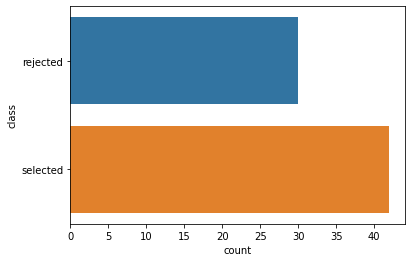

In [8]:
sns.countplot(y=resume_df['class'],label='count_plot')

In [9]:
pd.options.display.max_colwidth = 1000

In [10]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  72 non-null     object
 1   class        72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [11]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [12]:
resume_df['class'].value_counts()

selected    42
rejected    30
Name: class, dtype: int64

In [13]:
#encoding of class column into 0(rejected) and 1(selected)
resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='selected' else 0)
resume_df

,resume_text,class
0,RAJESH KUMAR OBJECTIVETo work in an environment which encourages me to succeed andgrow professionally where I can utilize my skills and knowledgeappropriately. EXPERIENCESaviance TechnologyySep 2020 - PresentSenior Software EngineerWorking as senior Python Developer for client Reckitt Benckiser.My job responsibilities is task automation and data extractionfrom various platform amd set data pipe line.Shorthillstech Pvt LtdOct 2018 - Aug 2020Software EngineerWorking as backend Python Developer. Here I worked for ETLprocess for data. Also worked to create REST API with Django.Tata Consultancy ServicesFeb 2016 - Sep 2018Systems EngineerWorked here as Java Developer and Python Developer to TCSBaNCS software. Also worked as Dev OPS profile. EDUCATIONKUK2015B. Tech in Computer Science & Engineering 70%GSSS Barwala2010Class XII 82%GSSS Barwala2008Class X 94% PROJECTSExplode USData Engineering: Data collection from various platforms usingSelenium Automtion and requests and BeautifulSou...,0
1,"Santosh Singh Software Developer with 4 years of experience in managing software project and Python developer and Data Analyst for MNC clients. Well versed with predictive modelling, data processing and ML to solve challenging business problems. Experience Data Analyst Bell Aliant, Dispatch unit | CGI Page 1 Personal Information Email santosh.engg@outlook.com Phone +91 9791158049 LinkedIn Linkedin.com/in/santosh.engg Apr’18 - Present Jul’17 - Apr’19 Nov’16- Jul’17 •Fulfilled all Data Engineer and Python Developer duties for a high-end capital firm. Python developer FWFM Bell Canada | CGI •Fulfilled all python developer duties for a high-end capital firm. Associate Software Engineer Ladbrokes Inc. | CGI •Fulfilled all Python and Oracle PL/SQL developer for a high-end capital Created and presented models for potential holding. Technical Skills Python, Numpy, Pandas Expert ● ● ● ● ● MySQL, Cloud, AWS EC2 Advanced ● ● ● ● ● Academics Data Visualization, Tableau, Au...",0
2,"Sensitivity: Internal & Restricted SIDDHANT JAIN Address: F-301, Civitech Sampriti, Sector 77, Noida-201301 Email ID: siddhantjain2108@gmail.com Contact: +91 9582108803 LinkedIn: https://www.linkedin.com/in/siddhant-jain-10732952 PROFESSIONAL SUMMARY • Having 7+ years of experience in IT industry as a Software Engineer. • Over 7+ years of IT experience in DWH, BI and ETL technologies using Teradata, Oracle, Datastage, SQL, UNIX, Netezza, Postgres, BigQuery. • Vantage Certified Advanced Developer – Teradata Certified. • Hand’s on experience on cloud-based platforms like GCP and Azure. • Strong hands on experience in writing SQL queries on database platforms and efficient in performing query optimization. • Used Teradata utilities - Fast Load, Multi Load, Fast Export, TPT and BTEQ with good understanding of Business Intelligence and Data Modeling and Data mining. Having strong knowledge on Teradata Architecture. • Good knowledge and hands on experience on various Google Cloud P...",0
3,"Vivek Gupta E-mail: vivekguptaiitdelhi@gmail.com SUMMARY OF EXPERIENCE ● IT Professional with 12+ years with 5+ years of experience in project management as Technical project manager and as a Scrum master. ● Experience in managing complex engagements and worked in coordination with different business units ● Diversified experience in project planning, managing schedules, deliveries and extensive experience in vendor and client management ● Managing projects distributed across geo by distributed agile methodology ● Exposure to program level management by using Scaled Agile Framework(SAFe) ● Dynamic, hands on and bilingual professionals have expertise in managing enterprise software development projects and exceeded all expectations. Demonstrated ability to motivate, organize, lead and coach scrum teams while delivering on time, under budget and above expectation. ● Have expertise in h...",0
4,"Aman KumarAssociate Staff EngineerEmail: amankumar0511@gmail.comContact: 7065488642E

In [14]:
class_1_df = resume_df[resume_df['class']==1]
class_1_df

,resume_text,class
30,"Personal Information7837644817 / 9717339722arpit1837@gmail.comProfessional sk illsSQL/ Teradata/ PostgreSQL/ OraclePython Informatica- Power CentreUnix - Shell ScriptingTableau ReportingData Architecture / WarehousingAgile MethodologyLanguages KnownEnglishHIndiProfessional SummaryFocused Data Analyst with 6 years of work experience and proven record of outperforming objec�ves, exceeding service standards and outpacing performance goals. Proficient Data Engineer with in-depth knowledge of Data Warehousing, Architecture and extensive Data analyses. Mo�vated, team-oriented and enthusias�c about using skills to boost customer experience and support company success.Professional ExperinceConsultant - EXL Services, GurgaonAug 2018 - �ll dateProjects in EXLProject 1: Healthcare JapanFor a leading japanese Heathcare company we aim to create and maintain data opera�ons & storage using Amazon Web Services, Python and Shell scrip�ng.Role in project: Python and shell script DeveloperAcco...",1
31,"Udit Sethi udit3682740@gmail.com | (+91) – 9660970067 www.linkedin.com/in/udit-sethi-703048131 Flat G3, Gaurav Adhikari Apartments, Sector - 62, Noida PROFILE SUMMARY: Data Engineer with 4 years of experience in data-driven decision making across multiple domains , completed 11 months Post Graduate Diploma in Data Science from IIIT Bangalore. Implemented effective end to end workflow which includes analysis, design , development (creating database and tables using sql and hive , listing key performance indicator, creating scripts written in python ) and testing with 2 years of experience in BI and Data Analytics . Good Analytical, communication, leadership, planning, coordination and relationship management skills, high energy and vibrant performance driven-professional with the proficiency to make things happen. Professional Experience Big Data Developer Tata Consultancy Services (TCS) , Noida April 2019 – Till Date Responsibilities Central role in a key company ...",1
32,"AKSHAY NIGAM : +91-9968830525 : nigamakshay11@gmail.com Seasoned Data Engineer with strong hold on ETL, Data Analytics, Data lake implementation in on-prem and Cloud using Big Data & Spark. AREAS OF EXPERTISE PROFESSIONAL SUMMARY • Seasoned technology professional with Five years and Three months of experience in the space of Business Intelligence and Analytics with strong exposure towards Data Lake pipeline implementation using technologies like big data, Python, Spark and Scala. • Developed the complex frameworks around features such as ETL, Data Integration, Datalake ingestion, Audit Balance Control checks, Unit Testing, source file data quality checks before ingestion, Change Data Capture, Strong Entitlement Process in data lake, Orchestration, Error logging & notification process around Failures and SLA checks , auto scaling of processing resources in AWS , code validation frameworks. • Have 4+ years of hands-on experience in implementing solutions around Data Mig...",1
33,"Kamal KumarData Engineerarora.kamal09@gmail.com8588811079Gurgaon, HaryanaWORK EXPERIENCENagarro SoftwareData EngineerGurgaon | Oct 2019 - current· Designed and implemented a real-time data pipeline to process semi-structureddata by using Kinesis streaming and Lambda function then stored processed datain Datalake. A separate lambda was developed to process that data to atomicbucket in parquet format and exposed over Athena by using Glue crawler.· Designed the data pipeline architecture for a new product that quickly reads thedata from temporary storage and store it into S3 with partitions then process thatdata into DynamoDB by using lambda. That data was exposed via api gateway todownstream systems.AccentureData EngineerGurgaon | Oct 2018 - Oct 2019· Automated ETL processes across billions of rows of data which reduced manualworkload by 33% monthly· SQL Advisory Automation is a custom developed splunk application, which intractswith oracle db and suggests sql recommendation and aw

In [15]:
class_0_df=resume_df[resume_df['class']==0]
class_0_df

,resume_text,class
0,RAJESH KUMAR OBJECTIVETo work in an environment which encourages me to succeed andgrow professionally where I can utilize my skills and knowledgeappropriately. EXPERIENCESaviance TechnologyySep 2020 - PresentSenior Software EngineerWorking as senior Python Developer for client Reckitt Benckiser.My job responsibilities is task automation and data extractionfrom various platform amd set data pipe line.Shorthillstech Pvt LtdOct 2018 - Aug 2020Software EngineerWorking as backend Python Developer. Here I worked for ETLprocess for data. Also worked to create REST API with Django.Tata Consultancy ServicesFeb 2016 - Sep 2018Systems EngineerWorked here as Java Developer and Python Developer to TCSBaNCS software. Also worked as Dev OPS profile. EDUCATIONKUK2015B. Tech in Computer Science & Engineering 70%GSSS Barwala2010Class XII 82%GSSS Barwala2008Class X 94% PROJECTSExplode USData Engineering: Data collection from various platforms usingSelenium Automtion and requests and BeautifulSou...,0
1,"Santosh Singh Software Developer with 4 years of experience in managing software project and Python developer and Data Analyst for MNC clients. Well versed with predictive modelling, data processing and ML to solve challenging business problems. Experience Data Analyst Bell Aliant, Dispatch unit | CGI Page 1 Personal Information Email santosh.engg@outlook.com Phone +91 9791158049 LinkedIn Linkedin.com/in/santosh.engg Apr’18 - Present Jul’17 - Apr’19 Nov’16- Jul’17 •Fulfilled all Data Engineer and Python Developer duties for a high-end capital firm. Python developer FWFM Bell Canada | CGI •Fulfilled all python developer duties for a high-end capital firm. Associate Software Engineer Ladbrokes Inc. | CGI •Fulfilled all Python and Oracle PL/SQL developer for a high-end capital Created and presented models for potential holding. Technical Skills Python, Numpy, Pandas Expert ● ● ● ● ● MySQL, Cloud, AWS EC2 Advanced ● ● ● ● ● Academics Data Visualization, Tableau, Au...",0
2,"Sensitivity: Internal & Restricted SIDDHANT JAIN Address: F-301, Civitech Sampriti, Sector 77, Noida-201301 Email ID: siddhantjain2108@gmail.com Contact: +91 9582108803 LinkedIn: https://www.linkedin.com/in/siddhant-jain-10732952 PROFESSIONAL SUMMARY • Having 7+ years of experience in IT industry as a Software Engineer. • Over 7+ years of IT experience in DWH, BI and ETL technologies using Teradata, Oracle, Datastage, SQL, UNIX, Netezza, Postgres, BigQuery. • Vantage Certified Advanced Developer – Teradata Certified. • Hand’s on experience on cloud-based platforms like GCP and Azure. • Strong hands on experience in writing SQL queries on database platforms and efficient in performing query optimization. • Used Teradata utilities - Fast Load, Multi Load, Fast Export, TPT and BTEQ with good understanding of Business Intelligence and Data Modeling and Data mining. Having strong knowledge on Teradata Architecture. • Good knowledge and hands on experience on various Google Cloud P...",0
3,"Vivek Gupta E-mail: vivekguptaiitdelhi@gmail.com SUMMARY OF EXPERIENCE ● IT Professional with 12+ years with 5+ years of experience in project management as Technical project manager and as a Scrum master. ● Experience in managing complex engagements and worked in coordination with different business units ● Diversified experience in project planning, managing schedules, deliveries and extensive experience in vendor and client management ● Managing projects distributed across geo by distributed agile methodology ● Exposure to program level management by using Scaled Agile Framework(SAFe) ● Dynamic, hands on and bilingual professionals have expertise in managing enterprise software development projects and exceeded all expectations. Demonstrated ability to motivate, organize, lead and coach scrum teams while delivering on time, under budget and above expectation. ● Have expertise in h...",0
4,"Aman KumarAssociate Staff EngineerEmail: amankumar0511@gmail.comContact: 7065488642E

In [16]:
#removing extra characters like bullets
resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',''))

In [17]:
resume_df

,resume_text,class
0,RAJESH KUMAR OBJECTIVETo work in an environment which encourages me to succeed andgrow professionally where I can utilize my skills and knowledgeappropriately. EXPERIENCESaviance TechnologyySep 2020 - PresentSenior Software EngineerWorking as senior Python Developer for client Reckitt Benckiser.My job responsibilities is task automation and data extractionfrom various platform amd set data pipe line.Shorthillstech Pvt LtdOct 2018 - Aug 2020Software EngineerWorking as backend Python Developer. Here I worked for ETLprocess for data. Also worked to create REST API with Django.Tata Consultancy ServicesFeb 2016 - Sep 2018Systems EngineerWorked here as Java Developer and Python Developer to TCSBaNCS software. Also worked as Dev OPS profile. EDUCATIONKUK2015B. Tech in Computer Science & Engineering 70%GSSS Barwala2010Class XII 82%GSSS Barwala2008Class X 94% PROJECTSExplode USData Engineering: Data collection from various platforms usingSelenium Automtion and requests and BeautifulSou...,0
1,"Santosh Singh Software Developer with 4 years of experience in managing software project and Python developer and Data Analyst for MNC clients. Well versed with predictive modelling, data processing and ML to solve challenging business problems. Experience Data Analyst Bell Aliant, Dispatch unit | CGI Page 1 Personal Information Email santosh.engg@outlook.com Phone +91 9791158049 LinkedIn Linkedin.com/in/santosh.engg Apr’18 - Present Jul’17 - Apr’19 Nov’16- Jul’17 •Fulfilled all Data Engineer and Python Developer duties for a high-end capital firm. Python developer FWFM Bell Canada | CGI •Fulfilled all python developer duties for a high-end capital firm. Associate Software Engineer Ladbrokes Inc. | CGI •Fulfilled all Python and Oracle PL/SQL developer for a high-end capital Created and presented models for potential holding. Technical Skills Python, Numpy, Pandas Expert ● ● ● ● ● MySQL, Cloud, AWS EC2 Advanced ● ● ● ● ● Academics Data Visualization, Tableau, Au...",0
2,"Sensitivity: Internal & Restricted SIDDHANT JAIN Address: F-301, Civitech Sampriti, Sector 77, Noida-201301 Email ID: siddhantjain2108@gmail.com Contact: +91 9582108803 LinkedIn: https://www.linkedin.com/in/siddhant-jain-10732952 PROFESSIONAL SUMMARY • Having 7+ years of experience in IT industry as a Software Engineer. • Over 7+ years of IT experience in DWH, BI and ETL technologies using Teradata, Oracle, Datastage, SQL, UNIX, Netezza, Postgres, BigQuery. • Vantage Certified Advanced Developer – Teradata Certified. • Hand’s on experience on cloud-based platforms like GCP and Azure. • Strong hands on experience in writing SQL queries on database platforms and efficient in performing query optimization. • Used Teradata utilities - Fast Load, Multi Load, Fast Export, TPT and BTEQ with good understanding of Business Intelligence and Data Modeling and Data mining. Having strong knowledge on Teradata Architecture. • Good knowledge and hands on experience on various Google Cloud P...",0
3,"Vivek Gupta E-mail: vivekguptaiitdelhi@gmail.com SUMMARY OF EXPERIENCE ● IT Professional with 12+ years with 5+ years of experience in project management as Technical project manager and as a Scrum master. ● Experience in managing complex engagements and worked in coordination with different business units ● Diversified experience in project planning, managing schedules, deliveries and extensive experience in vendor and client management ● Managing projects distributed across geo by distributed agile methodology ● Exposure to program level management by using Scaled Agile Framework(SAFe) ● Dynamic, hands on and bilingual professionals have expertise in managing enterprise software development projects and exceeded all expectations. Demonstrated ability to motivate, organize, lead and coach scrum teams while delivering on time, under budget and above expectation. ● Have expertise in h...",0
4,"Aman KumarAssociate Staff EngineerEmail: amankumar0511@gmail.comContact: 7065488642E

In [18]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)
stop_words.extend(['from','subject','re','gmail','com','Mobile','Email'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [20]:
# Cleaned text
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)

In [21]:
print(resume_df['cleaned'][0])

rajesh kumar objectiveto work environment encourages succeed andgrow professionally utilize skills technologyysep presentsenior software engineerworking senior python developer client reckitt benckiser job task automation data extractionfrom platform amd set data pipe line shorthillstech pvt ltdoct aug software engineerworking backend python developer worked etlprocess data worked create rest api django tata consultancy servicesfeb sep systems engineerworked java developer python developer tcsbancs software worked dev ops profile educationkuk tech science engineering gsss barwala class xii gsss barwala class projectsexplode usdata engineering data collection platforms usingselenium automtion requests beautifulsoup module ofpython result daily data availablity client businessprocess bvrweb development recommendations webdevelopment efficient tdd approach django delivered recommendation online shopping contactraj ashu vpo dhani khan bahadurteh distt hisar haryana jirabvr dashboardrest ap

In [22]:
print(resume_df['resume_text'][0])

RAJESH KUMAR OBJECTIVETo work in an environment which encourages me to succeed andgrow professionally where I can utilize my skills and knowledgeappropriately. EXPERIENCESaviance TechnologyySep 2020 - PresentSenior Software EngineerWorking as senior Python Developer for client Reckitt Benckiser.My job responsibilities is task automation and data extractionfrom various platform amd set data pipe line.Shorthillstech Pvt LtdOct 2018 - Aug 2020Software EngineerWorking as  backend Python Developer. Here I worked for ETLprocess for data. Also worked to create REST API with Django.Tata Consultancy ServicesFeb 2016 - Sep 2018Systems EngineerWorked here as Java Developer and Python Developer to TCSBaNCS software. Also worked as Dev OPS profile. EDUCATIONKUK2015B. Tech in Computer Science & Engineering 70%GSSS Barwala2010Class XII 82%GSSS Barwala2008Class X 94% PROJECTSExplode USData Engineering: Data collection from various platforms usingSelenium Automtion and requests and BeautifulSoup mo

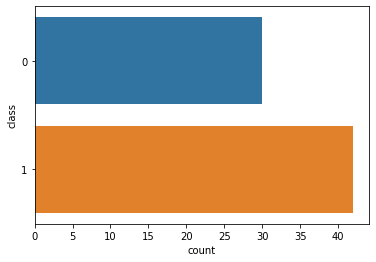

In [23]:
# Plot the counts of flagged vs not flagged
sns.countplot(y=resume_df['class'],label='count_plot')

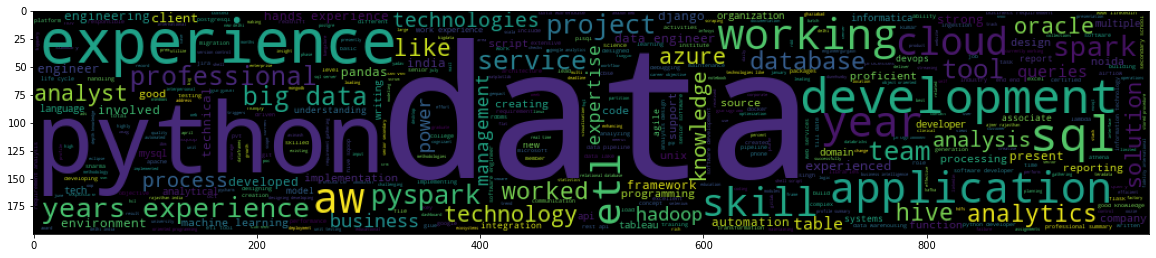

In [24]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].
cleaned))
plt.imshow(wc)

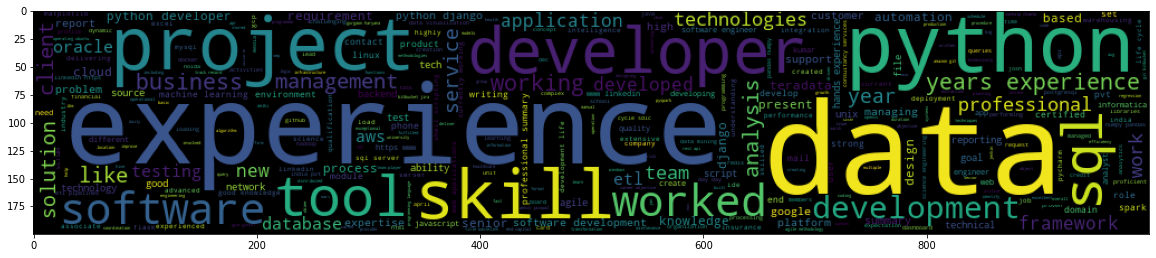

In [25]:
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].
cleaned))
plt.imshow(wc)

In [26]:
#================================================================

In [27]:
#================================================================

In [28]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
#sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']


In [29]:
#===============================================================

In [30]:
#===============================================================

In [31]:
#=================================================Another Approach

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# metrics are used to find accuracy or error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  
# loading data 
# data contains two columns ('text', 'target')

#spam = pd.read_csv('spam.csv')
#spam['target'] = np.where(spam_data['target']=='spam',1,0)

# split data
X_train, X_test, y_train, y_test = train_test_split(resume_df['cleaned'], resume_df['class'],
                                                    test_size=0.20, random_state=0) 

# fit vocabulary and extract word count features
cv = CountVectorizer()
X_traincv = cv.fit_transform(X_train)  
X_testcv = cv.transform(X_test)

# learn and predict using MultinomialNB
clfNB = MultinomialNB(alpha=0.1)
clfNB.fit(X_traincv, y_train)

# so far so good, but when I predict on X_testcv
y_pred = clfNB.predict(X_testcv) 
ml=metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE Naive Bayes MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE Naive Bayes MODEL:  0.7333333333333333


In [56]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
X=resume_df['cleaned']
Y=resume_df['class']
repeats = range(1,16)
results = list()
cv = CountVectorizer()
X = cv.fit_transform(X)


for r in repeats:
	# evaluate using a given number of repeats
  #cv = RepeatedKFold(n_splits=10, n_repeats=r, random_state=0)
  skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
  #model = XGBClassifier()
  svclf = svm.SVC(random_state=0)
  clfNB = MultinomialNB(alpha=0.1)
  #clf1 = RandomForestClassifier(n_estimators = 1000)  
  scores = cross_val_score(svclf, X, Y, scoring='accuracy', cv=skf, n_jobs=-1)
	# summarize
  print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
  results.append(scores)
print(results)

>1 mean=0.6111 se=0.014
>2 mean=0.6111 se=0.014
>3 mean=0.6111 se=0.014
>4 mean=0.6111 se=0.014
>5 mean=0.6111 se=0.014
>6 mean=0.6111 se=0.014
>7 mean=0.6111 se=0.014
>8 mean=0.6111 se=0.014
>9 mean=0.6111 se=0.014
>10 mean=0.6111 se=0.014
>11 mean=0.6111 se=0.014
>12 mean=0.6111 se=0.014
>13 mean=0.6111 se=0.014
>14 mean=0.6111 se=0.014
>15 mean=0.6111 se=0.014
[array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), array([0.58333333, 0.625     , 0.625     ]), arr

In [34]:
# from keras.models import Sequential
# from keras import layers
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.wrappers.scikit_learn import KerasClassifier

# X_train1 = X_traincv.toarray()
# X_test1 = X_traincv.toarray()
# #input_dim = X_traincv.shape[1]  # Number of features

# model = Sequential()
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

NameError: ignored

In [ ]:
# X_train1

In [ ]:
# model.compile(loss='binary_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])
# model.summary()


In [ ]:
# history = model.fit(X_train1, y_train,
#                     epochs=100,
#                     verbose=True,
#                     validation_data=(X_test1, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train1, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test1, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
# X_traincv

In [ ]:
#confusion matrix on Naive Bayes test data
#training data model
#y_predict_train = NB_classifier.predict(X_train)
NBcm = confusion_matrix(y_test, y_pred)
sns.heatmap(NBcm, annot = True)

In [58]:
#Random Forest
clf1 = RandomForestClassifier(n_estimators = 1000)  

  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf1.fit(X_traincv, y_train)
  
# performing predictions on the test dataset
y_pred1 = clf1.predict(X_testcv)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random Forest MODEL: ", metrics.accuracy_score(y_test, y_pred1))
rl=metrics.accuracy_score(y_test, y_pred1)

ACCURACY OF THE Random Forest MODEL:  0.45454545454545453


In [59]:
#SVM
from sklearn import svm
svclf = svm.SVC(random_state=0)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
svclf.fit(X_traincv, y_train)
  
# performing predictions on the test dataset
y_pred2 = svclf.predict(X_testcv)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

# using metrics module for accuracy calculation
print("ACCURACY OF THE SVM MODEL: ", metrics.accuracy_score(y_test, y_pred2))

ACCURACY OF THE SVM MODEL:  0.5454545454545454


In [ ]:
print(metrics.f1_score(y_test, y_pred2))

In [ ]:
#######################################################
#Hyperparameter tuning using grid search
######################################################

In [ ]:
#Grid search

In [60]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# Create a Random Forest Classifier
svclf1 = svm.SVC(random_state=0)

# Hyperparameter Optimization
parameters = {'C': [0.1, 0.5, 1.0, 2.0],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [2, 3, 5],
             'gamma': ['auto', 'scale'],
             'tol': [1e-5, 1e-3, 1e-2],
             'max_iter': [-1, 50, 100]}

# Run the grid search
grid_obj = GridSearchCV(svclf1, parameters)
grid_obj = grid_obj.fit(X_traincv, y_train)

# Set the rf to the best combination of parameters
svclf1 = grid_obj.best_estimator_


# Train the model using the training sets 
#svclf1.fit(X_traincv,y_train)
grid_obj.fit(X_traincv,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1.0, 2.0], 'degree': [2, 3, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 50, 100],
                         'tol': [1e-05, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
svclf2 = svm.SVC(random_state=0,**grid_obj.best_params_)


In [47]:
svclf2.fit(X_traincv,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=1e-05,
    verbose=False)

In [61]:
# metrics are used to find accuracy or error
from sklearn import metrics  
# performing predictions on the test dataset
y_pred3 = grid_obj.predict(X_testcv)
# using metrics module for accuracy calculation
print("ACCURACY OF THE SVM MODEL: ", metrics.accuracy_score(y_test, y_pred3))

ACCURACY OF THE SVM MODEL:  0.5


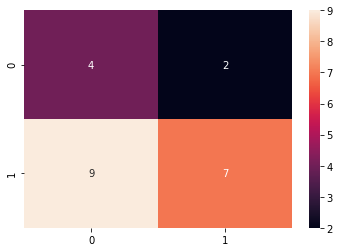

In [62]:
#confusion matrix on SVM
#training data model
#y_predict_train = NB_classifier.predict(X_train)

RFcm = confusion_matrix(y_test, y_pred3)
sns.heatmap(RFcm, annot = True)

In [ ]:
  

ax= plt.subplot()
sns.heatmap(RFcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Rejected', 'Selected']); ax.yaxis.set_ticklabels(['Rejected', 'Selected']);

ax.figure.savefig("ConfusionMatrix.png")

In [ ]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_traincv, y_train)
y_pred4 = model.predict(X_testcv)
print(model)
print("ACCURACY OF THE xg MODEL: ", metrics.accuracy_score(y_test, y_pred4))

In [ ]:
#====================================RESUME PREDICTION

In [ ]:
#=====================================

In [ ]:
mypath='/content/ResumeRanking/MLRESUME/' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
print(onlyfiles)
reject=[]
for i in range(0, len(onlyfiles)):
    file = onlyfiles[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      reject.append(safe_text)
predict_df = pd.DataFrame(reject, columns = ['resume_text' ])
#resume_df.head(2)

In [ ]:
predict_df['resume_text']=predict_df['resume_text'].apply(lambda x: x.replace('\r',''))

In [ ]:
# Cleaned text
predict_df['cleaned']=predict_df['resume_text'].apply(preprocess)
#predict_df['cleaned']

In [ ]:
#=====================Naive Baiyes
X_testcv1 = cv.transform(predict_df['cleaned'])
clfNB.predict(X_testcv1)

In [ ]:
#======================Random Forest
clf1.predict(X_testcv1)

In [ ]:
#======================SVM
svclf.predict(X_testcv1)

In [ ]:
#====================For Ranking

In [ ]:
rfprediction=svclf.predict(X_testcv1)
print(onlyfiles,rfprediction)

outputdf=pd.DataFrame(list(zip(onlyfiles, rfprediction)),
               columns =['Name', 'Class'])
outputdf

In [ ]:
outputdf['Class']=outputdf['Class'].apply(lambda x:'Selected' if x==1 else 'Rejected')
summarydf=outputdf['Class'].groupby([outputdf['Class']]).count()

outputdf = outputdf[outputdf['Class']=='Selected']
summarydf

In [ ]:
#outputdf.to_csv('/content/ResumeRanking/MLSelected.csv')

In [ ]:
#=================================================RANKING NLP=======================

In [ ]:
#==================================================

In [ ]:
def pdfextract(file):
    raw = parser.from_file(file)
    raw = str(raw)

    safe_text = raw.encode('utf-8', errors='ignore')

    safe_text = str(safe_text).replace("\n", "").replace("\\", "")
    #print('--- safe text ---' )
    #print( safe_text )
    return safe_text

#function to read resume ends

In [ ]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('/content/ResumeRanking/JD_weightage.csv')
    
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DeepLearning', None, *DL_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DataEngineering', None, *Data_Engineering_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
  
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends

In [ ]:
#code to execute/call the above functions

final_database=pd.DataFrame()
onlyfiles=list(outputdf['Name'])
for i in range(0, len(onlyfiles)):
    file = onlyfiles[i]
    if 'pdf' in file:
      #print('fffffffffffffffffffffffffffffffffffffffffffff',file)
      dat = create_profile(file)
      final_database = final_database.append(dat)
      
print(final_database)

In [ ]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()

final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
new_data

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
#plt.savefig('python_pretty_plot.png')
plt.show()
#pic.savefig('python_pretty_plot1.png')


In [ ]:
#!pip install excel2img

In [ ]:
#Generate df with weightage and technology


df = pd.read_csv('/content/ResumeRanking/JD_weightage.csv')
#ndf=df.iloc[:, 0:2].append(df.iloc[:, 2:4], ignore_index = True)
col1=list(df.iloc[:,0])+ list(df.iloc[:,2]) + list(df.iloc[:,4])+ list(df.iloc[:,6])+list(df.iloc[:,8])+ list(df.iloc[:,10])
col2=list(df.iloc[:,1])+ list(df.iloc[:,3]) + list(df.iloc[:,5])+ list(df.iloc[:,7])+list(df.iloc[:,9])+ list(df.iloc[:,11])
tabledf=pd.DataFrame(list(zip(col1, col2)),columns =['Keyword', 'WeightageScore'])
tabledf.dropna(axis=0, how='all',inplace=True)
tabledf.head(5)


In [ ]:
final_database.Keyword = final_database.Keyword.str.rstrip()

In [ ]:
prepdf=final_database.merge( tabledf, on='Keyword', how='left')
prepdf.head(19)

In [ ]:
#Preparing graph for all subjects
prepdf_all=prepdf.groupby(by=['Candidate Name','Subject'],sort=False).sum()
prepdf_all

In [ ]:
#Saving fig for all subjects
#prepdf_all.unstack().plot(kind='barh',figsize=(15, 15),legend=True).get_figure().savefig('output.png')

In [ ]:
prepdf['Count']=prepdf['Count'].astype(int)
prepdf

In [ ]:
df2=prepdf[['Candidate Name','Subject','WeightageScore']].groupby(by=['Candidate Name','Subject'],sort=False).sum().unstack()
# plot with annotations is probably easier
p1 = df2.plot.bar(figsize=(20, 8), ylabel='WeightageScore', title="Resume Weightage By Category")
p1.set_xticklabels(p1.get_xticklabels(), rotation=30)


for p in p1.patches:
    p1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width() / 2.,
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
        textcoords = 'offset points')

p1.figure.savefig('python_pretty_plot.png')

In [ ]:
prepdf

In [ ]:
#prepdf['MScore']=prepdf.Count * prepdf.Weightage
#prepdf['NormalizeWeightage']=prepdf.Weightage/100
prepdf
def subjectwisedata(subvar):

  prepdf_subject=prepdf[prepdf['Subject']==subvar]
  prepdf_subject=prepdf_subject.groupby(by=['Candidate Name'],sort=False).sum()
  #prepdf_subject['class']=prepdf_subject['WeightageScore'].apply(lambda x: 1 if x>50 else 0)
  return prepdf_subject

newdf=subjectwisedata('Python')
newdf
#prepdf

In [ ]:
outputdf.drop('Name', axis=1, inplace=True)
outputdf['Name']=final_database['Candidate Name'].drop_duplicates().values
outputdf['WeightageScore']=list(newdf['WeightageScore'])
outputdf['SkillCount']=list(newdf['Count'])
outputdf=outputdf[['Name','Class','WeightageScore','SkillCount']]
#outputdf[['Name','Class','WeightageScore','SkillCount']].to_csv('/content/ResumeRanking/MLFinal.csv',index=False)
#outputdf.to_excel('/content/ResumeRanking/MLFinal.xlsx',sheet_name='AWS_PYTHON Developer',index=False)

In [ ]:
newdf

In [ ]:
#
#cm = confusion_matrix(y_test, y_predict_test)
#ConfusionMatrix=sns.heatmap(RFcm, annot = True)
#ConfusionMatrix.figure.savefig("ConfusionMatrix.png")

In [ ]:
noutputdf=outputdf[outputdf['Class']=='Selected']

noutputdf.reset_index(drop=True)

In [ ]:


# writer = pd.ExcelWriter('/content/ResumeRanking/MLFinal.xlsx', engine = 'xlsxwriter')
# noutputdf.to_excel(writer, sheet_name='AWS_PYTHON Developer',index=False)
# # create an empty dataframe
# my_df  = pd.DataFrame()
# my_df.to_excel(writer, sheet_name='Graph',index=False)
# worksheet = writer.sheets['Graph']

# worksheet.insert_image('C8','python_pretty_plot.png')
# my_df1  = pd.DataFrame()
# my_df1.to_excel(writer, sheet_name='ConfusionMatrix',index=False)
# worksheet = writer.sheets['ConfusionMatrix']

# worksheet.insert_image('C8','ConfusionMatrix.png')

# writer.save()

In [ ]:
sdf=summarydf.to_frame(name='Class')
writer = pd.ExcelWriter('/content/ResumeRanking/MLFinal.xlsx', engine = 'xlsxwriter')

sdf.to_excel(writer, sheet_name='Summary',index=True)
noutputdf.to_excel(writer, sheet_name='AWS_PYTHON Developer',index=False)

# create an empty dataframe
my_df  = pd.DataFrame()
my_df.to_excel(writer, sheet_name='Graph',index=False)
worksheet = writer.sheets['Graph']

worksheet.insert_image('B2','python_pretty_plot.png')
my_df1  = pd.DataFrame()
my_df1.to_excel(writer, sheet_name='ConfusionMatrix',index=False)
worksheet = writer.sheets['ConfusionMatrix']

worksheet.insert_image('C8','ConfusionMatrix.png')

writer.save()
